# Basics of Pandas

Adopted from http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html

In [1]:
import pandas as pd
import numpy as np

## Object Creation

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns.
dates = pd.date_range('20130101',periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.378866,0.504119,0.464499,-0.171301
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855
2013-01-04,0.100729,-0.288633,-1.323152,0.161654
2013-01-05,0.319141,0.701684,-0.990322,-0.938994
2013-01-06,-1.994991,1.471600,-2.063802,-0.053743


In [5]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1.,
                 'B' : pd.Timestamp('20130102'),
                 'C' : pd.Series(1,index=range(4),dtype='float32'),
                 'D' : np.array([3] * 4,dtype='int32'),
                 'E' : 'foo' })
    
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [6]:
# Having specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

## Viewing Data

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.378866,0.504119,0.464499,-0.171301
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855
2013-01-04,0.100729,-0.288633,-1.323152,0.161654
2013-01-05,0.319141,0.701684,-0.990322,-0.938994


In [8]:
#Display the index,columns, and the underlying numpy data
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [10]:
df.values

array([[ 0.37886622,  0.50411921,  0.46449905, -0.17130109],
       [-0.0021604 , -1.25766086, -2.0198519 , -0.89849399],
       [-0.20160556,  0.41177092, -1.35666734, -1.78585541],
       [ 0.10072864, -0.28863305, -1.32315171,  0.16165443],
       [ 0.31914111,  0.70168434, -0.99032174, -0.93899426],
       [-1.99499146,  1.47159958, -2.0638021 , -0.05374273]])

In [11]:
#Describe shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.233337,0.257147,-1.214883,-0.614456
std,0.888763,0.932731,0.924253,0.730933
min,-1.994991,-1.257661,-2.063802,-1.785855
25%,-0.151744,-0.113532,-1.854056,-0.928869
50%,0.049284,0.457945,-1.339910,-0.534898
75%,0.264538,0.652293,-1.073529,-0.083132
max,0.378866,1.471600,0.464499,0.161654


In [12]:
#Transpose
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.378866,-0.002160,-0.201606,0.100729,0.319141,-1.994991
B,0.504119,-1.257661,0.411771,-0.288633,0.701684,1.471600
C,0.464499,-2.019852,-1.356667,-1.323152,-0.990322,-2.063802
D,-0.171301,-0.898494,-1.785855,0.161654,-0.938994,-0.053743


In [13]:
# Sorting by an axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.171301,0.464499,0.504119,0.378866
2013-01-02,-0.898494,-2.019852,-1.257661,-0.002160
2013-01-03,-1.785855,-1.356667,0.411771,-0.201606
2013-01-04,0.161654,-1.323152,-0.288633,0.100729
2013-01-05,-0.938994,-0.990322,0.701684,0.319141
2013-01-06,-0.053743,-2.063802,1.471600,-1.994991


## Selection

In [15]:
# Selecting a single column, which yields a Series, equivalent to df.A
df['A']

2013-01-01    0.378866
2013-01-02   -0.002160
2013-01-03   -0.201606
2013-01-04    0.100729
2013-01-05    0.319141
2013-01-06   -1.994991
Freq: D, Name: A, dtype: float64

In [16]:
# Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2013-01-01,0.378866,0.504119,0.464499,-0.171301
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855


In [17]:
df[pd.Timestamp('20130102'):pd.Timestamp('20130104')]

,A,B,C,D
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855
2013-01-04,0.100729,-0.288633,-1.323152,0.161654


### Selection by Label

In [18]:
# Selecting via [], which slices the rows.
df.loc[dates[0]]

A    0.378866
B    0.504119
C    0.464499
D   -0.171301
Name: 2013-01-01 00:00:00, dtype: float64

In [19]:
# Selecting on a multi-axis by label
df.loc[:,['A','B']]

,A,B
2013-01-01,0.378866,0.504119
2013-01-02,-0.002160,-1.257661
2013-01-03,-0.201606,0.411771
2013-01-04,0.100729,-0.288633
2013-01-05,0.319141,0.701684
2013-01-06,-1.994991,1.471600


In [20]:
#Showing label slicing, both endpoints are included
df.loc[pd.Timestamp('20130102'):pd.Timestamp('20130104'),['A','B']]

,A,B
2013-01-02,-0.002160,-1.257661
2013-01-03,-0.201606,0.411771
2013-01-04,0.100729,-0.288633


In [21]:
# Reduction in the dimensions of the returned object
df.loc['20130102',['A','B']]

A   -0.002160
B   -1.257661
Name: 2013-01-02 00:00:00, dtype: float64

In [22]:
# For getting a scalar value
df.loc[dates[0],'A']

0.3788662243872122

In [23]:
# For getting fast access to a scalar (equiv to the prior method)
df.at[dates[0],'A']

0.3788662243872122

### selecting by position

In [24]:
# Select via the position of the passed integers
df.iloc[3]

A    0.100729
B   -0.288633
C   -1.323152
D    0.161654
Name: 2013-01-04 00:00:00, dtype: float64

In [25]:
# By integer slices, acting similar to numpy/python
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.100729,-0.288633
2013-01-05,0.319141,0.701684


In [26]:
#By lists of integer position locations, similar to the numpy/python style
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.002160,-2.019852
2013-01-03,-0.201606,-1.356667
2013-01-05,0.319141,-0.990322


In [27]:
# For slicing rows explicitly
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855


In [28]:
# For slicing columns explicitly
df.iloc[:,1:3]

,B,C
2013-01-01,0.504119,0.464499
2013-01-02,-1.257661,-2.019852
2013-01-03,0.411771,-1.356667
2013-01-04,-0.288633,-1.323152
2013-01-05,0.701684,-0.990322
2013-01-06,1.471600,-2.063802


In [29]:
#For getting a value explicitly
df.iloc[1,1]

-1.2576608555036974

In [30]:
#For getting fast access to a scalar (equiv to the prior method)
df.iat[1,1]

-1.2576608555036974

## Boolean Indexing

In [31]:
# Using a single column’s values to select data.
df[df.A > 0]

,A,B,C,D
2013-01-01,0.378866,0.504119,0.464499,-0.171301
2013-01-04,0.100729,-0.288633,-1.323152,0.161654
2013-01-05,0.319141,0.701684,-0.990322,-0.938994


In [32]:
# A where operation for getting.
df[df > 0]

,A,B,C,D
2013-01-01,0.378866,0.504119,0.464499,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,0.411771,NaN,NaN
2013-01-04,0.100729,NaN,NaN,0.161654
2013-01-05,0.319141,0.701684,NaN,NaN
2013-01-06,NaN,1.471600,NaN,NaN


In [33]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['E']=['one', 'one','two','three','four','three']

In [34]:
df2

,A,B,C,D,E
2013-01-01,0.378866,0.504119,0.464499,-0.171301,one
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494,one
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855,two
2013-01-04,0.100729,-0.288633,-1.323152,0.161654,three
2013-01-05,0.319141,0.701684,-0.990322,-0.938994,four
2013-01-06,-1.994991,1.471600,-2.063802,-0.053743,three


In [35]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855,two
2013-01-05,0.319141,0.701684,-0.990322,-0.938994,four


## missing data

Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [36]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [37]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [38]:
df1

,A,B,C,D,E
2013-01-01,0.378866,0.504119,0.464499,-0.171301,1.0
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494,1.0
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855,NaN
2013-01-04,0.100729,-0.288633,-1.323152,0.161654,NaN


In [39]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.378866,0.504119,0.464499,-0.171301,1.0
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494,1.0


In [40]:
#Filling missing data
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.378866,0.504119,0.464499,-0.171301,1.0
2013-01-02,-0.002160,-1.257661,-2.019852,-0.898494,1.0
2013-01-03,-0.201606,0.411771,-1.356667,-1.785855,5.0
2013-01-04,0.100729,-0.288633,-1.323152,0.161654,5.0


In [41]:
# To get the boolean mask where values are nan
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# Operations

## Stats
Operations in general exclude missing data.

In [42]:
# Performing a descriptive statistic
df.mean()

A   -0.233337
B    0.257147
C   -1.214883
D   -0.614456
dtype: float64

In [43]:
# Same operation on the other axis
df.mean(1)

2013-01-01    0.294046
2013-01-02   -1.044542
2013-01-03   -0.733089
2013-01-04   -0.337350
2013-01-05   -0.227123
2013-01-06   -0.660234
Freq: D, dtype: float64

In [44]:
# Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [45]:
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.201606,-0.588229,-2.356667,-2.785855
2013-01-04,-2.899271,-3.288633,-4.323152,-2.838346
2013-01-05,-4.680859,-4.298316,-5.990322,-5.938994
2013-01-06,NaN,NaN,NaN,NaN


## Apply
Applying functions to the data

In [46]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.378866,0.504119,0.464499,-0.171301
2013-01-02,0.376706,-0.753542,-1.555353,-1.069795
2013-01-03,0.175100,-0.341771,-2.912020,-2.855650
2013-01-04,0.275829,-0.630404,-4.235172,-2.693996
2013-01-05,0.594970,0.071281,-5.225494,-3.632990
2013-01-06,-1.400021,1.542880,-7.289296,-3.686733


In [47]:
df.apply(lambda x: x.max() - x.min())

A    2.373858
B    2.729260
C    2.528301
D    1.947510
dtype: float64

## Histogramming

In [48]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    4
1    5
2    4
3    0
4    4
5    3
6    0
7    2
8    3
9    6
dtype: int64

In [49]:
s.value_counts()

4    3
3    2
0    2
6    1
5    1
2    1
dtype: int64

# String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [50]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

Pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [51]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.611264,-0.212933,0.256423,-0.671282
1,1.957363,-1.267875,-1.805190,-1.007707
2,0.308139,-0.111322,-0.517199,0.940925
3,-0.951705,-1.330151,-0.552584,1.170849
4,0.724299,0.723344,-1.291415,0.629146
5,0.011429,0.235123,-0.863051,-0.804096
6,0.444483,-1.337166,0.114056,0.648041
7,-0.505045,1.335703,-0.676492,0.760155
8,-0.716108,0.139719,0.868435,1.480763
9,-1.027664,0.378294,-0.852323,0.284244


In [52]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [53]:
pd.concat(pieces)

,0,1,2,3
0,-0.611264,-0.212933,0.256423,-0.671282
1,1.957363,-1.267875,-1.805190,-1.007707
2,0.308139,-0.111322,-0.517199,0.940925
3,-0.951705,-1.330151,-0.552584,1.170849
4,0.724299,0.723344,-1.291415,0.629146
5,0.011429,0.235123,-0.863051,-0.804096
6,0.444483,-1.337166,0.114056,0.648041
7,-0.505045,1.335703,-0.676492,0.760155
8,-0.716108,0.139719,0.868435,1.480763
9,-1.027664,0.378294,-0.852323,0.284244


## Join
SQL style merges.

In [54]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [55]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [56]:
left

,key,lval
0,foo,1
1,foo,2


In [57]:
right

,key,rval
0,foo,4
1,foo,5


In [58]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [59]:
## Append Append rows to a dataframe

In [60]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.195164,1.324728,0.222723,-0.606958
1,-0.321575,-0.795861,0.488580,1.489665
2,-0.183220,-0.326759,0.419601,-0.615405
3,-0.013440,-0.419009,-0.501189,-0.292469
4,1.383113,0.657937,1.329530,1.334977
5,0.692911,0.022253,-0.699612,-1.126033
6,-0.659687,-0.419730,-1.136536,-0.704735
7,-0.096768,-0.877521,-0.038830,-0.704820


In [61]:
s = df.iloc[3]

In [62]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.195164,1.324728,0.222723,-0.606958
1,-0.321575,-0.795861,0.488580,1.489665
2,-0.183220,-0.326759,0.419601,-0.615405
3,-0.013440,-0.419009,-0.501189,-0.292469
4,1.383113,0.657937,1.329530,1.334977
5,0.692911,0.022253,-0.699612,-1.126033
6,-0.659687,-0.419730,-1.136536,-0.704735
7,-0.096768,-0.877521,-0.038830,-0.704820
8,-0.013440,-0.419009,-0.501189,-0.292469


## Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

In [63]:
 df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
    
df

,A,B,C,D
0,foo,one,1.771627,1.582669
1,bar,one,-0.856327,0.176162
2,foo,two,1.574207,-0.737903
3,bar,three,1.836078,-1.060784
4,foo,two,1.372603,-1.834043
5,bar,two,0.583202,0.118357
6,foo,one,-1.319198,-0.503940
7,foo,three,-0.574550,-0.618069


In [64]:
# Grouping and then applying a function sum to the resulting groups
df.groupby('A').sum()

,C,D
A,,
bar,1.562953,-0.766264
foo,2.824689,-2.111286


In [65]:
#Grouping by multiple columns forms a hierarchical index, which we then apply the function.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.856327  0.176162
    three  1.836078 -1.060784
    two    0.583202  0.118357
foo one    0.452430  1.078729
    three -0.574550 -0.618069
    two    2.946810 -2.571946

## Reshaping

In [66]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [67]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [68]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [69]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.455406 -0.776401
      two     1.278701 -0.188073
baz   one    -0.208782 -1.315471
      two    -0.725471  0.396161

In [70]:
#The stack function “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.455406
               B   -0.776401
       two     A    1.278701
               B   -0.188073
baz    one     A   -0.208782
               B   -1.315471
       two     A   -0.725471
               B    0.396161
dtype: float64

In [71]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack is unstack, which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.455406 -0.776401
      two     1.278701 -0.188073
baz   one    -0.208782 -1.315471
      two    -0.725471  0.396161

In [72]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.455406  1.278701
      B -0.776401 -0.188073
baz   A -0.208782 -0.725471
      B -1.315471  0.396161

In [73]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.455406 -0.208782
       B -0.776401 -1.315471
two    A  1.278701 -0.725471
       B -0.188073  0.396161

In [74]:
## Pivot Tables

In [75]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.127909,-0.504176
1,one,B,foo,1.146535,-0.473020
2,two,C,foo,0.960276,1.266475
3,three,A,bar,0.383106,1.925530
4,one,B,bar,-0.019908,1.604353
5,one,C,bar,-1.061746,1.542318
6,two,A,foo,3.183924,-0.265422
7,three,B,foo,2.030150,0.026082
8,one,C,foo,0.489750,-1.266668
9,one,A,bar,0.482984,0.236726


In [76]:
#We can produce pivot tables from this data very easily:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.482984 -0.127909
      B -0.019908  1.146535
      C -1.061746  0.489750
three A  0.383106       NaN
      B       NaN  2.030150
      C -0.669264       NaN
two   A       NaN  3.183924
      B  0.865775       NaN
      C       NaN  0.960276

# Time series

Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [77]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [78]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [79]:
ts.resample('5Min', how='sum')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


2012-01-01    23519
Freq: 5T, dtype: int64

In [80]:
#Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.348661
2012-03-07    1.495119
2012-03-08    0.192361
2012-03-09    0.291598
2012-03-10    0.909447
Freq: D, dtype: float64

In [81]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.348661
2012-03-07 00:00:00+00:00    1.495119
2012-03-08 00:00:00+00:00    0.192361
2012-03-09 00:00:00+00:00    0.291598
2012-03-10 00:00:00+00:00    0.909447
Freq: D, dtype: float64

In [82]:
#Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.348661
2012-03-06 19:00:00-05:00    1.495119
2012-03-07 19:00:00-05:00    0.192361
2012-03-08 19:00:00-05:00    0.291598
2012-03-09 19:00:00-05:00    0.909447
Freq: D, dtype: float64

In [83]:
#Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.148368
2012-02-29   -0.058736
2012-03-31   -0.405698
2012-04-30    2.173459
2012-05-31   -1.387402
Freq: M, dtype: float64

In [84]:
ps = ts.to_period()
ps

2012-01    0.148368
2012-02   -0.058736
2012-03   -0.405698
2012-04    2.173459
2012-05   -1.387402
Freq: M, dtype: float64

In [85]:
ps.to_timestamp()
ps

2012-01    0.148368
2012-02   -0.058736
2012-03   -0.405698
2012-04    2.173459
2012-05   -1.387402
Freq: M, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [86]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.163806
1990-06-01 09:00   -0.415557
1990-09-01 09:00   -0.703440
1990-12-01 09:00    0.338221
1991-03-01 09:00   -0.723775
Freq: H, dtype: float64

# Categoricals

In [87]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [88]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [89]:
#Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)
df["grade"].cat.categories = ["very good", "good", "very bad"]


In [90]:
#Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [91]:
#Sorting is per order in the categories, not lexical order.
df.sort_values("grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [92]:
#Grouping by a categorical column shows also empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [93]:
# Plotting

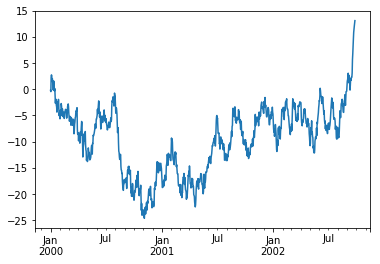

In [94]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
%matplotlib inline
ts.plot()

<Figure size 432x288 with 0 Axes>

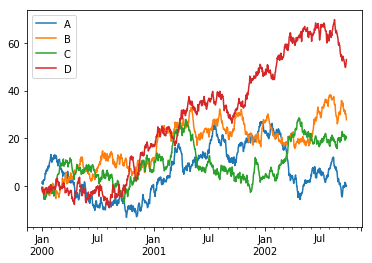

In [95]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 
df = df.cumsum()
import matplotlib.pyplot as plt
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting data in and out

## CSV

In [96]:
#Writing to a csv file
df.to_csv('foo.csv')

In [97]:
#Reading from a csv file
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.974434,-0.750892,-1.311964,-0.731609
1,2000-01-02,1.854704,-0.618904,-0.669422,-2.503800
2,2000-01-03,1.688730,-0.645113,-2.177798,-2.552523
3,2000-01-04,0.605989,-0.631024,-2.558599,-2.736102
4,2000-01-05,0.977612,-1.654009,-3.151966,-2.493279
5,2000-01-06,2.406654,-2.245893,-3.313673,-2.491594
6,2000-01-07,2.582668,-3.352015,-5.639218,-1.497784
7,2000-01-08,2.285399,-4.336433,-5.351705,-3.602213
8,2000-01-09,2.330444,-5.613134,-4.862864,-3.001806
9,2000-01-10,2.889051,-4.960563,-4.682242,-1.928943
